In [1]:
import torch
import torchvision
from torchvision.models.detection import FasterRCNN_ResNet50_FPN_Weights
from Custom_RCNN import modify_fasterrcnn

device=torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(f"Using device: {device}")

weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT
# Load model
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights=weights).to(device)
model = modify_fasterrcnn(model, num_classes=2).to(device) # surgery on output classes
transforms=weights.transforms()

# load weights
# model.load_state_dict(torch.load("weights/epoch_2.pth"))

# load category dict
charname_to_id=["bg","char"]
model.category_dict=charname_to_id
# model.category_dict=weights.meta["categories"]

Using device: cuda


C:\Users\zyr\AppData\Local\Temp\ipykernel_22612\828072654.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("weights/epoch_1.pth"))


Converting RGBA to RGB
tensor([519.6359, 312.0560, 545.4095, 365.7576], device='cuda:0') char tensor(0.4905, device='cuda:0')
tensor([515.7947, 307.4850, 575.5648, 388.6088], device='cuda:0') char tensor(0.4483, device='cuda:0')
tensor([514.2701, 306.4011, 532.6911, 358.8040], device='cuda:0') char tensor(0.4419, device='cuda:0')
tensor([492.3669, 301.4139, 560.1188, 364.6332], device='cuda:0') char tensor(0.4305, device='cuda:0')
tensor([445.3746, 278.5059, 465.3928, 307.1504], device='cuda:0') char tensor(0.4289, device='cuda:0')
tensor([624.7939, 671.8958, 685.5046, 742.4112], device='cuda:0') char tensor(0.4202, device='cuda:0')
tensor([519.9684, 331.5480, 554.6093, 363.1431], device='cuda:0') char tensor(0.4161, device='cuda:0')
tensor([652.8530, 688.5552, 676.0540, 726.1627], device='cuda:0') char tensor(0.4031, device='cuda:0')
tensor([627.6516, 683.2944, 680.8202, 722.4039], device='cuda:0') char tensor(0.4022, device='cuda:0')


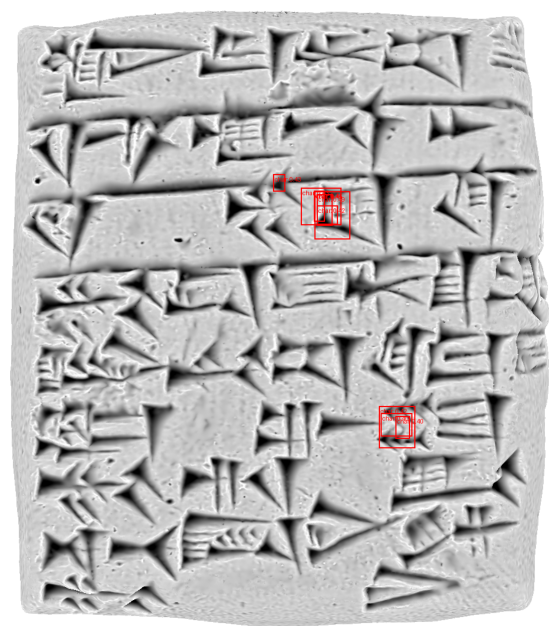

In [4]:
from plot_utils import run_and_plot

# load weights
model.load_state_dict(torch.load("weights/epoch_1.pth"))

run_and_plot("../HeiCuBeDa/Images_MSII_Filter/HS_1295_HeiCuBeDa_GMOCF_r1.50_n4_v512_06_back.png", model, transforms,thres=0.4);
# run_and_plot("animalwalk.jpg", model, transforms,thres=0.5);